1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style="whitegrid")

df = pd.read_csv('../data/togo-dapaong_qc.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

print("Shape:", df.shape)
df.head()

Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


 2. Summary Statistics & Null Report

In [2]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [3]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Comments    525600
dtype: int64

In [4]:
missing_pct = df.isnull().mean() * 100
missing_pct[missing_pct > 5]

Comments    100.0
dtype: float64

In [5]:
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object

3. Outlier Detection

In [6]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_to_check]))
pd.DataFrame(z_scores > 3, columns=columns_to_check).sum()

GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

 4. Data Cleaning

In [7]:
df_clean = df.copy()

for col in ['GHI', 'DNI', 'DHI']:
    df_clean[col] = df_clean[col].apply(lambda x: max(x, 0))

df_clean['WS'] = df_clean['WS'].replace(0, np.nan)
df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)

if 'Comments' in df_clean.columns:
    df_clean.drop(columns=['Comments'], inplace=True)

df_clean['Cleaning'] = df_clean['Cleaning'].astype(bool)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

df_clean.to_csv('../data/togo_clean.csv', index=False)

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_8608\3796335955.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)


5. Time Series Visualization

d:\@kaim\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


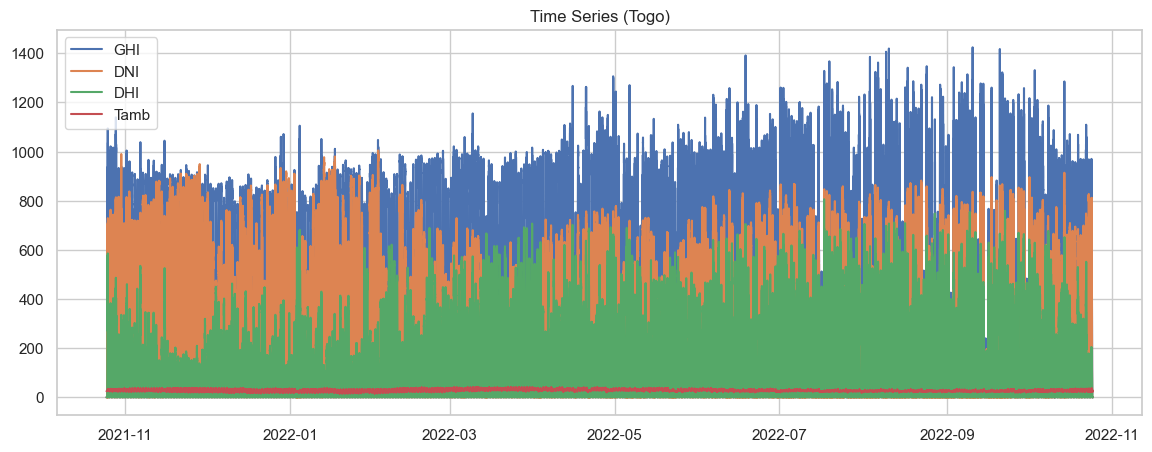

In [8]:
plt.figure(figsize=(14, 5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title('Time Series (Togo)')
plt.grid(True)
plt.show()

6. Cleaning Impact (ModA & ModB)

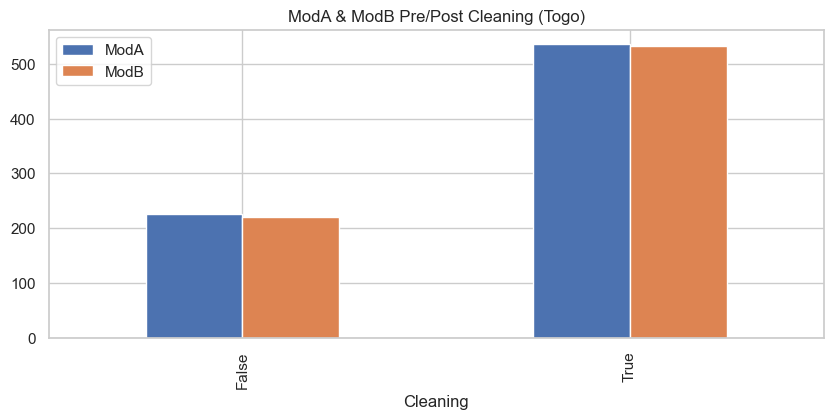

In [9]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('ModA & ModB Pre/Post Cleaning (Togo)')
plt.grid(True)
plt.show()

7. Correlation Heatmap

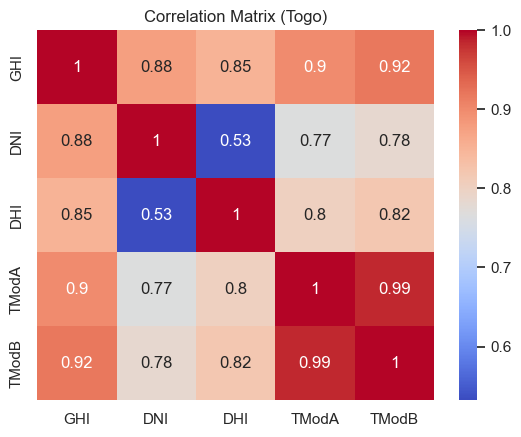

In [10]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Togo)')
plt.show()

 8. Scatter ploting Analysis

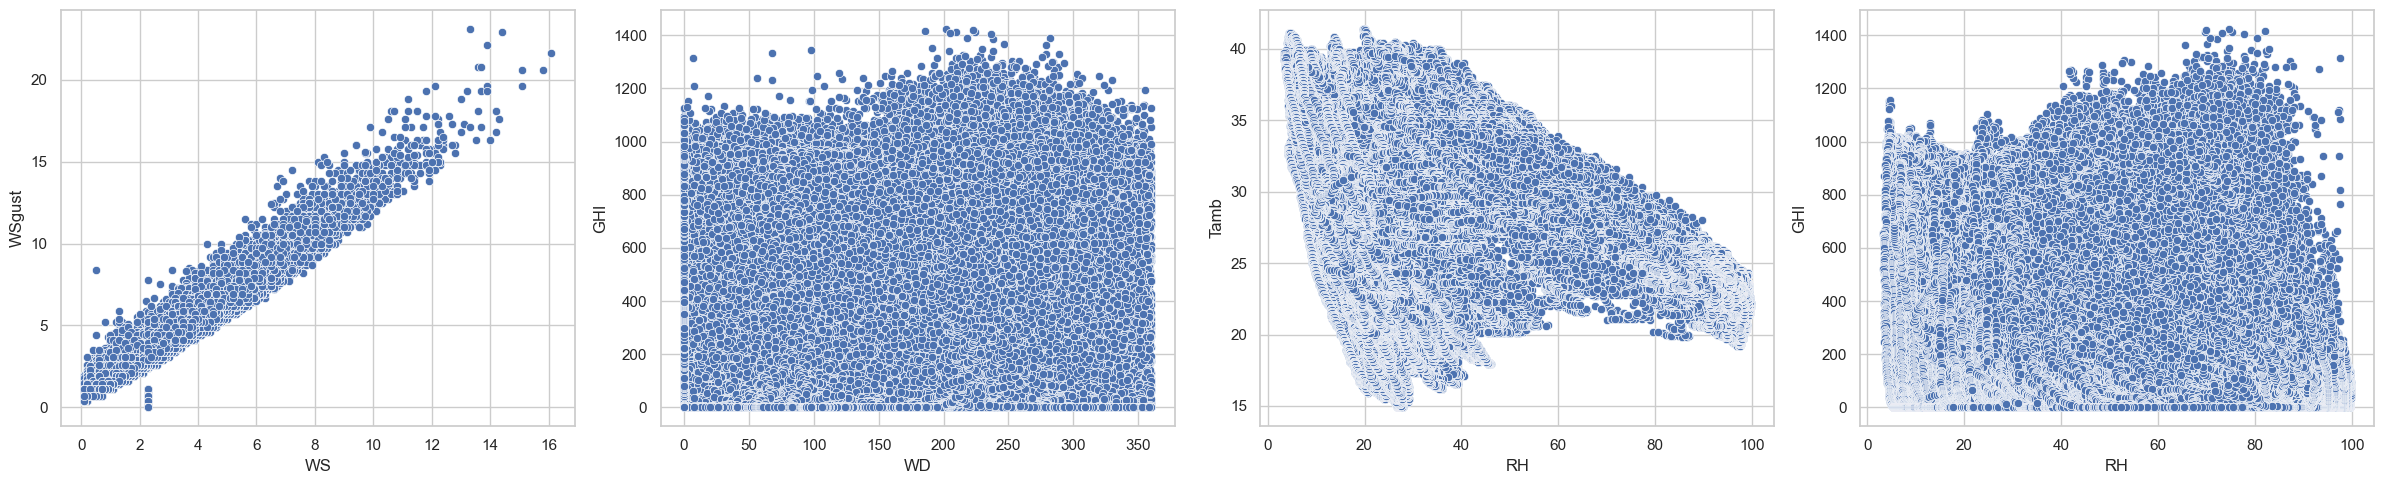

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
sns.scatterplot(ax=axes[0], data=df_clean, x='WS', y='WSgust')
sns.scatterplot(ax=axes[1], data=df_clean, x='WD', y='GHI')
sns.scatterplot(ax=axes[2], data=df_clean, x='RH', y='Tamb')
sns.scatterplot(ax=axes[3], data=df_clean, x='RH', y='GHI')
plt.tight_layout()
plt.show()

9. Wind Rose

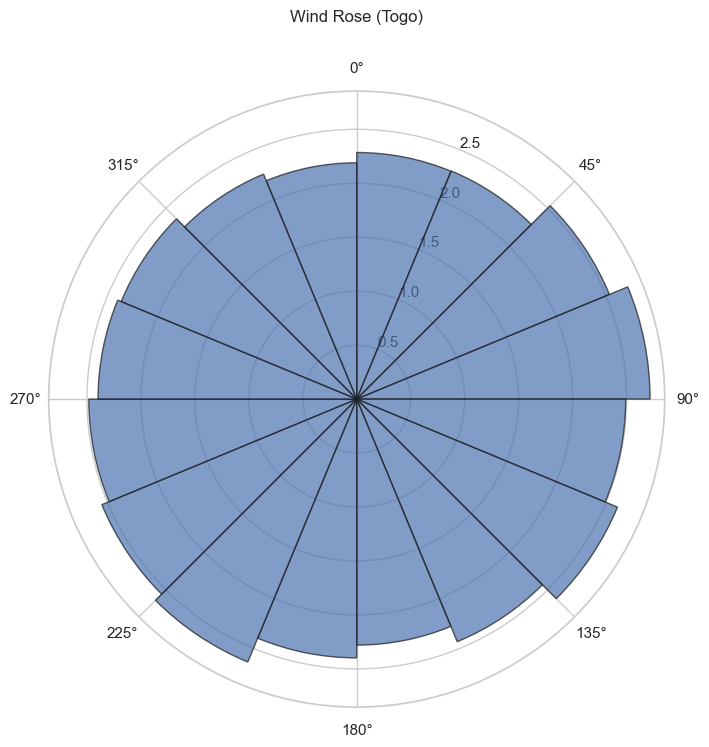

In [12]:
wd_rad = np.deg2rad(df_clean['WD'])
ws = df_clean['WS']
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bins = np.linspace(0, 2 * np.pi, 17)
wd_bin = np.digitize(wd_rad, bins) - 1
ws_mean = [ws[wd_bin == i].mean() for i in range(len(bins)-1)]
bars = ax.bar(bins[:-1], ws_mean, width=(2 * np.pi / 16), align='edge', edgecolor='k', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose (Togo)', y=1.1)
plt.show()

10. Histograms

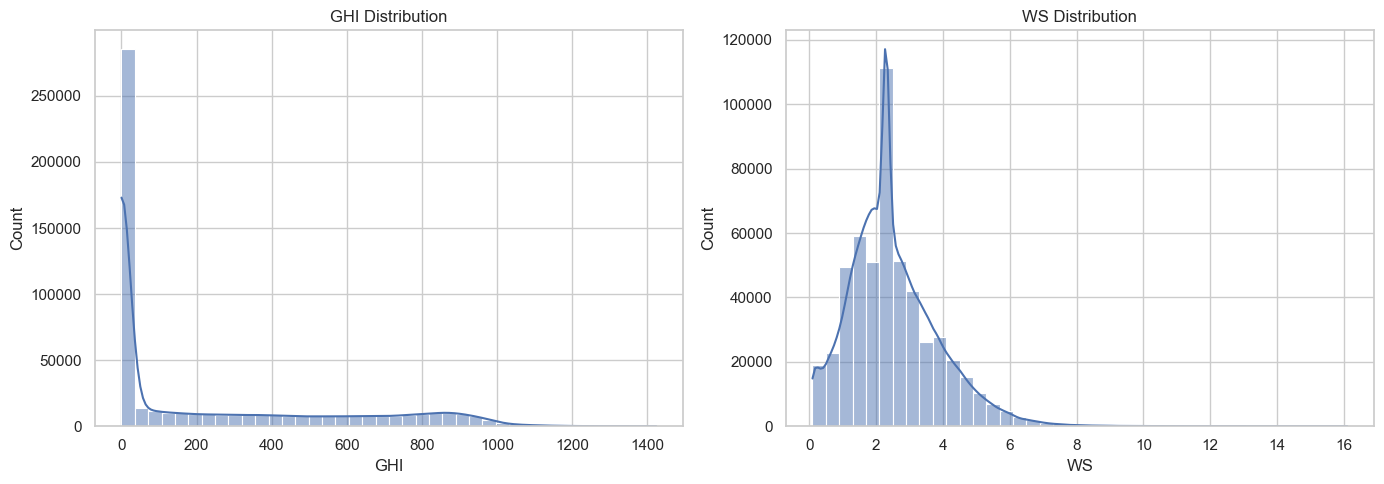

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_clean['GHI'], bins=40, kde=True, ax=axes[0])
sns.histplot(df_clean['WS'], bins=40, kde=True, ax=axes[1])
axes[0].set_title('GHI Distribution')
axes[1].set_title('WS Distribution')
plt.tight_layout()
plt.show()

11. Bubble Chart

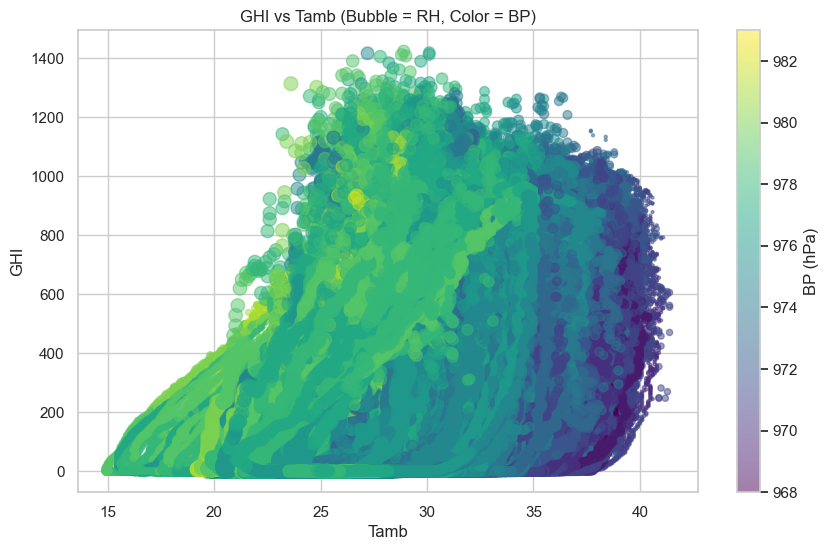

In [14]:
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    df_clean['Tamb'], df_clean['GHI'],
    s=df_clean['RH'], alpha=0.5, c=df_clean['BP'], cmap='viridis'
)
plt.colorbar(bubble, label='BP (hPa)')
plt.title('GHI vs Tamb (Bubble = RH, Color = BP)')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.grid(True)
plt.show()